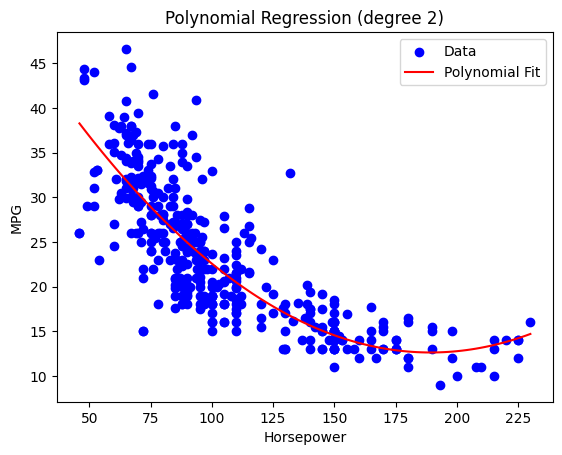

Mean Squared Error (MSE): 13.94
Root Mean Squared Error (RMSE): 3.73
R-squared (R²): 0.74


In [11]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Load dataset
data = sns.load_dataset('mpg')

# Handle missing values
df = data.copy()
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)

# Select feature and target
X = df[['horsepower']]
y = df['mpg']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial feature transformation
degree = 2
poly = PolynomialFeatures(degree)
X_poly_train = poly.fit_transform(X_train)

# Train the model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predict on test data
X_poly_test = poly.transform(X_test)
y_pred = model.predict(X_poly_test)

# Visualization
plt.scatter(X, y, color='blue', label='Data')
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)
plt.plot(X_range, y_range_pred, color='red', label='Polynomial Fit')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.title(f'Polynomial Regression (degree {degree})')
plt.show()

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R²): {r2:.2f}')
